<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/twyncoder/tf-handson-michelin-private/blob/master/L04_IntroCNN-SOLUCION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table>

# Redes de Aprendizaje Profundo básicas con Keras y Tensorflow.
## *Convolutional Deep Neural Networks (CNN) para clasificación multi-clase*

# 0. Preparación del entorno y comprobación de requisitos

In [1]:
# Common imports
import os
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
from tensorflow import keras

# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_name, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_name + "." + fig_extension)
    print("Saving figure", fig_name)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

def print_history(history,title=None, extension='png'):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    #plt.gca().set_ylim(0, 1)
    plt.xlabel("epochs")
    if(title!=None):
        plt.title(title)
        save_fig(title,fig_extension=extension)

### Información de versiones

In [2]:
print(tf.__version__)

2.17.1


### Comprobar si disponemos de una GPU

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 1. Dataset

In [4]:
from numpy import load
data = load('bloodmnist.npz')
X_train_orig = data['train_images']
X_valid_orig = data['val_images']
X_test_orig = data['test_images']
Y_train = data['train_labels']
Y_valid = data['val_labels']
Y_test = data['test_labels']

A continuación se dispone de las etiquetas de las clases a las que pueden pertenecer las imágenes.

In [7]:
labels = ["basophil","eosinophil","erythroblast","immature granulocytes",
          "lymphocyte","monocyte","neutrophil","platelet"]

**¡AHORA TÚ!**
- Averigua las dimensiones de los datos de entrada proporcionados en el dataset
- Escribe una función para mostrar ejemplos de la base de datos con su etiqueta correspondiente y llámala desde la celda de más abajo

In [5]:
#TODO

In [ ]:
def show_example(x,y):
    #<<<FIXME>>>

In [6]:
#SOLUTION
print(X_train_orig.shape)
print(X_test_orig.shape)

(11959, 28, 28, 3)
(3421, 28, 28, 3)


In [ ]:
#SOLUTION
def show_example(x,y):
    plt.imshow(x)
    plt.colorbar()
    plt.axis('off')
    plt.show()
    #print(int(y))
    label=labels[y[0]]
    print(label)

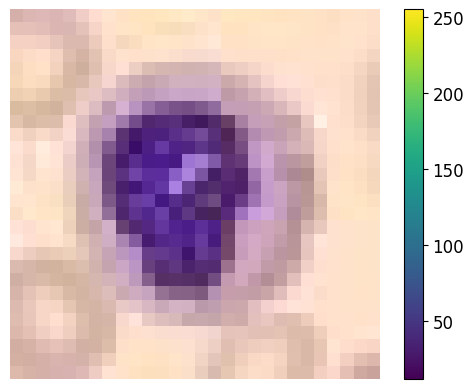

neutrophil


In [9]:
N = 5
show_example(X_train_orig[N],Y_train[N])

### Estandarización de las entradas

In [10]:
X_mean = X_train_orig.mean(axis=0, keepdims=True)
X_std = X_train_orig.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train_orig - X_mean) / X_std
X_valid = (X_valid_orig - X_mean) / X_std
X_test = (X_test_orig - X_mean) / X_std

**¡AHORA TÚ!**
- Observa las dimensiones de `X_mean` y `X_std` con `.shape` y explica cómo se está haciendo la estandarización de los datos de entrada a la red.
- Observa que `X_mean` y `X_std` se calculan sobre el set de entrenamiento, pero después se aplican también para **pseudo estandarizar** el set de validación y el set de test, ¿puedes explicar por qué no se calculan `X_mean` y `X_std` sobre todas las imágenes disponibles y solamente sobre el set de entrenamiento?.

In [11]:
#TODO

In [12]:
#SOLUTION
print(X_train.shape)
print(X_mean.shape)
print(X_std.shape)

(11959, 28, 28, 3)
(1, 28, 28, 3)
(1, 28, 28, 3)


In [13]:
# SOLUTION
# X_mean es una imagen de 28x28 px con el valor medio de cada píxel a lo largo de todo el set de entrenamiento
# X_std es una imagen de 28x28 px con la desviación estándar de cada a lo largo de todo el set de entrenamiento
# Cuando vayamos a hacer inferencia con el set de validación y de test, tenemos que aplicar la misma estandarización
# para que las entradas tengan una distribución próxima a la del entrenamiento.

# 2. Entrenamiento

## Modelo 'base' de red neuronal

In [ ]:
model1 = keras.models.Sequential()
model1.add(keras.layers.Conv2D(16, kernel_size=(3, 3),
                 activation='relu', padding='same',
                 input_shape=(28, 28, 3)))
model1.add(keras.layers.MaxPooling2D((2, 2)))
model1.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',  padding='same'))
model1.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(32, activation='relu'))
model1.add(keras.layers.Dense(<<<FIXME>>>, activation='softmax'))

**¡AHORA TÚ!**
- En base a la anterior definición de red neuronal:
  - Añade el valor adecuado en <<<FIXME>>>
  - Busca información sobre `keras.layers.Conv2D()` y averigua qué quiere decir `padding='same'`. ¿Qué otra opción existe para este parámetro y qué implicaciones tiene usarla?
  - ¿Cuántos _feature maps_ o `channels` se generan a la salida de la primera capa? ¿de qué tamaño son los `kernels` de convolución?
  - ¿Eres capaz de intuir cuáles serán las dimensiones de los _feature maps_ después de realizar el primer _pooling_?


In [15]:
#SOLUTION
model1 = keras.models.Sequential()
model1.add(keras.layers.Conv2D(16, kernel_size=(3, 3),
                 activation='relu', padding='same',
                 input_shape=(28, 28, 3)))
model1.add(keras.layers.MaxPooling2D((2, 2)))
model1.add(keras.layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',  padding='same'))
model1.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(32, activation='relu'))
model1.add(keras.layers.Dense(len(labels), activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


**¡AHORA TÚ!**
- Obtén un `summary()` de la red anterior responde a las siguientes cuestiones:
   - Asegúrate de entender cómo disminuye el tamaño de las capas en `height` y `width` desde 28x28 px a la entrada hasta 7x7 después de la última capa de _pooling_.
   - ¿Cuántos parámetros entrenables tiene la red? Compara esta cifra con el número de parámetros de los modelos _fully connected_ de cuadernos anteriores. ¡Estamos creando una red con menos parámetros y esperamos que se comporte mejor!
   - ¿Eres capaz de explicar el número de parámetros entrenables de alguna de las capas?
   - Puedes probar a cambiar la configuración de `model1` y ver cómo afecta a los tamaños y número de capas.

In [17]:
#TODO SUMMARY

In [18]:
# SOLUTION
model1.summary()
#keras.utils.plot_model(model, show_shapes=True)
# - La opción padding='same' hace que la salida tenga las mismas dimensiones, debido a que se hace padding antes de hacer la
# convolución. La opción padding='valid' aplica la convolución solamente en la región válida, así que la salida se reducirá
# de acuerdo a las dimensiones del kernel de convolución.
# - En la primera capa hay 16 _feature_maps_ y los kernels de convolución tienen tamaño 3x3
# En la segunda capa...
# La red tiene 55,338 parámetros entrenables, frente a 266,610 que tenía el modelo base anterior


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │          50,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 8)                   │             264 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,560 (217.03 KB)

 Trainable params: 55,560 (217.03 KB)

 Non-trainable params: 0 (0.00 B)

**¡AHORA TÚ!**
- Entrena la red neuronal durante 15 epochs con un optimizador `adam`
- Ve observando durante el entrenamiento los resultados de `acc` y `val_acc`

In [19]:
#TODO COMPILE MODEL

In [ ]:
#TODO FIT MODEL

In [20]:
# SOLUTION
model1.compile(loss="sparse_categorical_crossentropy",
              optimizer='adam',
              metrics=["accuracy"])

In [21]:
# SOLUTION
history1 = model1.fit(X_train, Y_train, epochs=15,
                    validation_data=(X_valid, Y_valid))

Epoch 1/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 12s 27ms/step - accuracy: 0.6156 - loss: 1.0970 - val_accuracy: 0.8335 - val_loss: 0.4759
Epoch 2/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.8442 - loss: 0.4450 - val_accuracy: 0.8662 - val_loss: 0.3857
Epoch 3/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.8722 - loss: 0.3522 - val_accuracy: 0.8855 - val_loss: 0.3176
Epoch 4/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9045 - loss: 0.2728 - val_accuracy: 0.8931 - val_loss: 0.2992
Epoch 5/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9110 - loss: 0.2448 - val_accuracy: 0.9083 - val_loss: 0.2630
Epoch 6/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9273 - loss: 0.2037 - val_accuracy: 0.9054 - val_loss: 0.2796
Epoch 7/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 10s 28ms/step - accuracy: 0.9424 - loss: 0.1727 - val_accuracy: 0.9083 - val_loss: 0.2666
Epoch 8/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9411 - loss: 0.1682 - va

**¡AHORA TÚ!**
- Muestra una gráfica la evolución del entrenamiento
  - ¿Se produce _overfitting_ durante el entrenamiento? Si es así, ¿a partir de qué _epoch_ aproximadamente?

In [ ]:
#TODO PLOT HISTORY

Saving figure L04_IntroCNNsBlood_adam


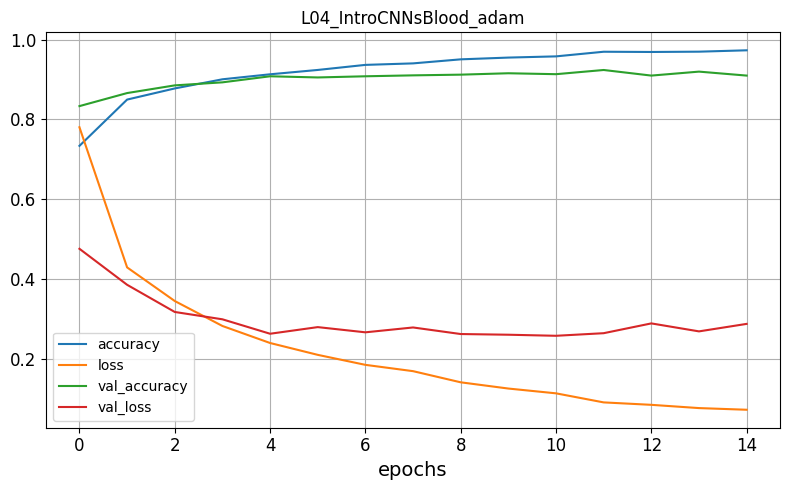

In [22]:
#SOLUTION 
print_history(history1,"L04_IntroCNNsBlood_adam")

## Batch Normalization

Vamos a incorporar capas de `BatchNormalization()` a nuestro modelo.
- Llámalo esta vez `model2`
- Batch Normalization actúa como técnica de regularización.
- Prueba a introducirlo entre las capas de convolución y _pooling_ y en la penúltima capa _fully connected_
- **No** debes incluir las activaciones en la capa anterior a `BatchNormalization()` **pero debes** incluir una capa de activación en la capa siguiente.
- ¿Cuántos parámetros entrenables y no entrenables se han añadido a la red?
- **No entrenes la red todavía**

In [23]:
#TODO BATCHNORMALIZATION

In [29]:
# SOLUTION
model2 = keras.models.Sequential()
model2.add(keras.layers.Conv2D(16, kernel_size=(3, 3),
                 padding='same',use_bias=False,activation = None,
                 input_shape=(28, 28, 3)))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Activation("relu"))
model2.add(keras.layers.MaxPooling2D((2, 2)))
model2.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation=None,
                 padding='same',use_bias=False))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Activation("relu"))
model2.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(32,use_bias=False,activation=None))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Activation("relu"))
model2.add(keras.layers.Dense(10, activation='softmax'))
model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 28, 28, 16)          │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 28, 28, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 14, 14, 32)          │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │          50,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_5 (Activation)            │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,866 (218.23 KB)

 Trainable params: 55,706 (217.60 KB)

 Non-trainable params: 160 (640.00 B)

## Early Stopping

- Parar el entrenamiento es una forma de prevenir que la red sobreentrene y también de no gastar tiempo de cómputo innecesariamente.
- Se puede dejar a la red que siga entrenando durante un tiempo, pero utilizar después en la etapa de inferencia los parámetros que proporcionaron el menor `val_loss` o la mejor `val_acc` (distintos de los de la última _epoch_).

In [30]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,verbose=1)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("model2.keras", save_best_only=True)

**¡AHORA TÚ!**
- Vamos a entrenar la red `model2` durante 15 _epochs_ y a guardar los resultados del entrenamiento en una variable `history2`
- Para el entrenamiento, incluye los _callbacks_ `early_stopping_cb` y `model_checkpoint_cb` tal y como los hemos definido arriba. Para ejecutar varios _callback_ simultáneamente recuerda que puedes hacer una lista con corchetes en la llamada en la función `fit()`.
- Mientras se realiza el entrenamiento revisa información sobre `EarlyStopping()` y `ModelCheckpoint()`.
   - https://keras.io/api/callbacks/early_stopping/
   - https://keras.io/api/callbacks/model_checkpoint/


In [31]:
#TODO EARLY STOPPING

In [32]:
# SOLUTION
model2.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999),
              metrics=["accuracy"])
history2 = model2.fit(X_train, Y_train, epochs=15,
                    validation_data=(X_valid, Y_valid),callbacks=[early_stopping_cb,model_checkpoint_cb])

Epoch 1/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.7227 - loss: 0.9137 - val_accuracy: 0.8832 - val_loss: 0.3673
Epoch 2/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.8987 - loss: 0.3203 - val_accuracy: 0.9001 - val_loss: 0.2921
Epoch 3/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9251 - loss: 0.2298 - val_accuracy: 0.9013 - val_loss: 0.2779
Epoch 4/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 21s 36ms/step - accuracy: 0.9425 - loss: 0.1747 - val_accuracy: 0.9100 - val_loss: 0.2447
Epoch 5/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9551 - loss: 0.1380 - val_accuracy: 0.9036 - val_loss: 0.2548
Epoch 6/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 13s 35ms/step - accuracy: 0.9643 - loss: 0.1149 - val_accuracy: 0.9141 - val_loss: 0.2373
Epoch 7/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9725 - loss: 0.0900 - val_accuracy: 0.9171 - val_loss: 0.2412
Epoch 8/15
374/374 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.9750 - loss: 0.0810 - 

**¡AHORA TÚ!**
- Finalizado el entrenamiento, representa un gráfico con la evolución de la red y a continuación, responde a las siguientes preguntas:
  - ¿En qué _epoch_ se ha parado el entrenamiento?
  - ¿En qué _epoch_ se obtenía el menor _val_loss_?
  - ¿Los parámetros de qué epoch se han salvado en 'model2.keras'?

In [33]:
#TODO PLOT HISTORY

Saving figure L04_IntroCNNs_adam_early


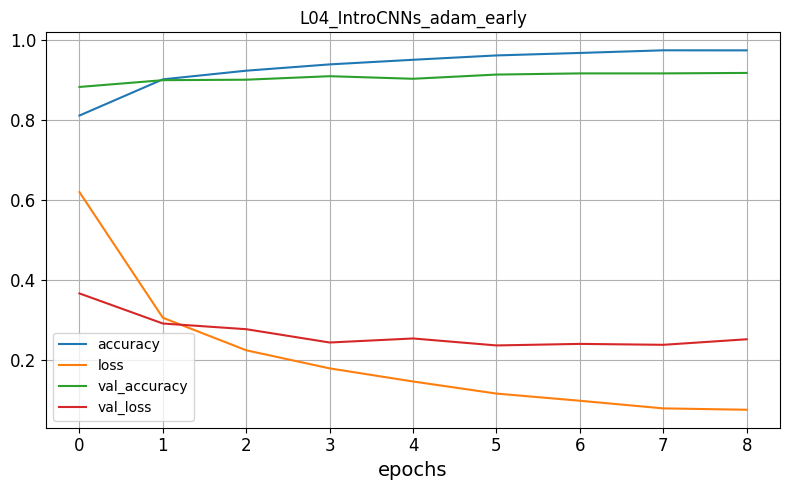

In [35]:
# SOLUTION
print_history(history2,"L04_IntroCNNs_adam_early")

## Variación dinámica del learning rate
- Una forma de prevenir el sobreentrenamiento es ir disminuyendo de manera dinámica el _learning rate_. De hecho, algunos optimizadores lo hacen internamente de manera automática.
- Entre las estrategias más utilizadas encontramos _Reduce on plateau_, que consiste en añadir un _callback_ para que se reduzca el `learning_rate` cuando el _loss_ se queda en una meseta.

In [36]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.4, patience=2,verbose=1)

**¡AHORA TÚ!**
- Vamos a volver a entrenar modelo `model1` (sin _Batch Normalization_) o `model2`, pero esta vez variando el _learning rate_ dinámicamente.
- Vuelve a definir el modelo y llámalo `model3`

In [37]:
#TODO NEW MODEL

In [43]:
# SOLUTION
model3 = keras.models.Sequential()
model3.add(keras.layers.Conv2D(16, kernel_size=(3, 3),
                 padding='same',use_bias=False,activation = None,
                 input_shape=(28, 28, 3)))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Activation("relu"))
model3.add(keras.layers.MaxPooling2D((2, 2)))
model3.add(keras.layers.Conv2D(32, kernel_size=(3, 3), activation=None,
                 padding='same',use_bias=False))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Activation("relu"))
model3.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(32,use_bias=False,activation=None))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Activation("relu"))
model3.add(keras.layers.Dense(10, activation='softmax'))
model3.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 28, 28, 16)          │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 28, 28, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 14, 14, 32)          │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │          50,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_11 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,866 (218.23 KB)

 Trainable params: 55,706 (217.60 KB)

 Non-trainable params: 160 (640.00 B)

**¡AHORA TÚ!**
- Añade el _callback_ `lr_scheduler` durante el entrenamiento, junto con  `model_checkpoint_cb`.
- Opcionalmente puedes añadir el callback `early_stopping_cb`, pero si el entrenamiento para demasido pronto y no se disminuye el _learning_rate_ y quieras quitarlo para poder observar bien el efecto de `lr_scheduler`.
- Para no sobreescribir `model2.h5` será mejor que vuelvas a definir `model_checkpoint_cb` e incluir esta vez `model3.keras`.
- Lanza un entrenamiento con al menos 20 epochs y empleando el siguiente optimizador
- Mientras se realiza revisa información sobre `EarlyStopping()`.
   - https://keras.io/api/callbacks/reduce_lr_on_plateau/
- Grafica los resultados y compara con entrenamientos anteriores

In [44]:
optimizer = keras.optimizers.Adam(learning_rate=0.001)

In [45]:
#TODO DEFINE CALLBACK

In [ ]:
#TODO COMPILE MODEL

In [ ]:
#TODO FIT MODEL

In [ ]:
#TODO PLOT HISTORY

In [46]:
#SOLUTION DEFINE CALLBACK
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("model3.keras", save_best_only=True)

In [ ]:
# SOLUTION COMPILE MODEL
model3.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [49]:
#SOLUTION FIT MODEL
history3 = model3.fit(X_train, Y_train, epochs=15,
                    validation_data=(X_valid, Y_valid),
                   #callbacks=[lr_scheduler,early_stopping_cb,model_checkpoint_cb])
                   callbacks=[lr_scheduler,model_checkpoint_cb])

Epoch 1/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 18s 40ms/step - accuracy: 0.9382 - loss: 0.1881 - val_accuracy: 0.9182 - val_loss: 0.2418 - learning_rate: 0.0010
Epoch 2/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 14s 36ms/step - accuracy: 0.9528 - loss: 0.1508 - val_accuracy: 0.9095 - val_loss: 0.2412 - learning_rate: 0.0010
Epoch 3/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 13s 36ms/step - accuracy: 0.9616 - loss: 0.1222 - val_accuracy: 0.9112 - val_loss: 0.2595 - learning_rate: 0.0010
Epoch 4/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9675 - loss: 0.1034
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0004000000189989805.
374/374 ━━━━━━━━━━━━━━━━━━━━ 21s 37ms/step - accuracy: 0.9675 - loss: 0.1034 - val_accuracy: 0.9019 - val_loss: 0.2839 - learning_rate: 0.0010
Epoch 5/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 21s 38ms/step - accuracy: 0.9826 - loss: 0.0665 - val_accuracy: 0.9246 - val_loss: 0.2155 - learning_rate: 4.0000e-04
Epoch 6/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 19s 52ms/step - accuracy: 0.9887 -

Saving figure L04_IntroCNNs_lrreduce


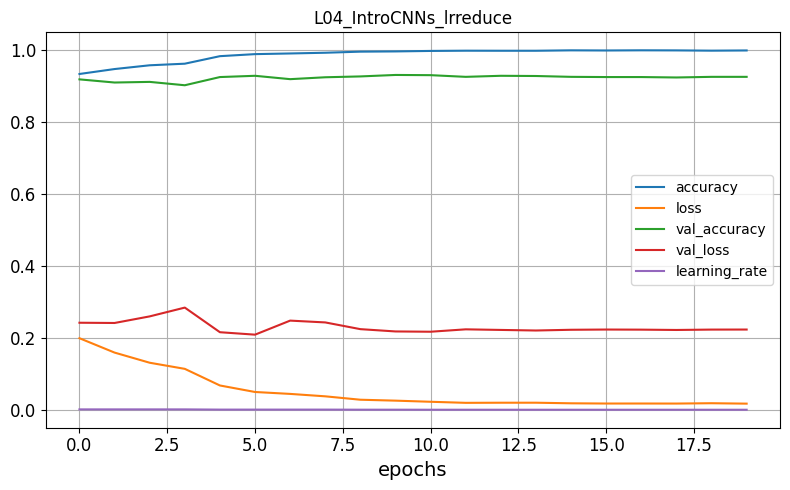

In [50]:
#SOLUTION PLOT HISTORY
# print_history(history3,"L04_IntroCNNs_lrreduce")

## Dropout
- Puedes introducir capas de Dropout de la siguiente manera.

`keras.layers.Dropout(rate=...)`

**¡AHORA TÚ!**
- Crea un nuevo modelo `model4` añadiendo capas de dropout  después de las capas de _pooling_ en `model2`. Puedes probar con valores de `rate=0.25` por ejemplo.
- Lanza un entrenamiento de al menos 20 _epochs_ y con _Early Stopping_ y que guarde los pesos en `model4.keras`. Utiliza un valor de `epochs` y `patience` acorde a las capacidades de procesamiento de tu ordenador. Si es lento no pongas valores elevados. El valor de `patience` en el callback que reduce el _learning_rate_ deberá ser mayor que en callback que hace el _model_checkpoint_.
- Durante el mismo busca información sobre las capas `Dropout` y el parámetro `rate`.
- Grafica nuevamente los resultados y compara el entrenamiento con los modelos anteriores
- Por último, si el entrenamiento no se hubiera parado en la última _epoch_, salva los resultados con `model4.save("model4.keras")`

In [ ]:
#TODO DEFINE MODEL

In [ ]:
#TODO COMPILE MODEL

In [ ]:
#TODO CALLBACKS

In [ ]:
#TODO FIT MODEL

In [ ]:
#TODO PLOT HISTORY

In [51]:
# SOLUTION
model4 = keras.models.Sequential()
model4.add(keras.layers.Conv2D(16, kernel_size=(3, 3),
                 padding='same',use_bias=False,input_shape=(28, 28, 3)))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Activation('relu'))
model4.add(keras.layers.MaxPooling2D((2, 2)))
model4.add(keras.layers.Dropout(0.25)),
model4.add(keras.layers.Conv2D(32, kernel_size=(3, 3),padding='same',use_bias=False))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Activation("relu"))
model4.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model4.add(keras.layers.Dropout(0.25)),
model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(32,use_bias=False))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Activation("relu"))
model4.add(keras.layers.Dense(10, activation='softmax'))
model4.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 16)          │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 28, 28, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_12 (Activation)           │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 14, 14, 32)          │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_13 (Activation)           │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │          50,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_14 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,866 (218.23 KB)

 Trainable params: 55,706 (217.60 KB)

 Non-trainable params: 160 (640.00 B)

In [53]:
# SOLUTION COMPILE MODEL
optimizer = keras.optimizers.Adam(learning_rate=0.001)

model4.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [54]:
#SOLUTION CALLBACKS
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,verbose=1)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("model4.keras", save_best_only=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.4, patience=2,verbose=1)

In [55]:
#SOLUTION FIT MODEL
history4 = model4.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid),
                   callbacks=[lr_scheduler,early_stopping_cb,model_checkpoint_cb])

Epoch 1/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 21s 44ms/step - accuracy: 0.5776 - loss: 1.3052 - val_accuracy: 0.8405 - val_loss: 0.4853 - learning_rate: 0.0010
Epoch 2/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 18s 38ms/step - accuracy: 0.8320 - loss: 0.5177 - val_accuracy: 0.8727 - val_loss: 0.3473 - learning_rate: 0.0010
Epoch 3/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.8665 - loss: 0.3854 - val_accuracy: 0.8849 - val_loss: 0.3061 - learning_rate: 0.0010
Epoch 4/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.8824 - loss: 0.3445 - val_accuracy: 0.8762 - val_loss: 0.3130 - learning_rate: 0.0010
Epoch 5/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 20s 38ms/step - accuracy: 0.8966 - loss: 0.3011 - val_accuracy: 0.9065 - val_loss: 0.2494 - learning_rate: 0.0010
Epoch 6/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 14s 38ms/step - accuracy: 0.9035 - loss: 0.2734 - val_accuracy: 0.9176 - val_loss: 0.2258 - learning_rate: 0.0010
Epoch 7/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9136 - l

Saving figure L04_IntroCNNs_dropout


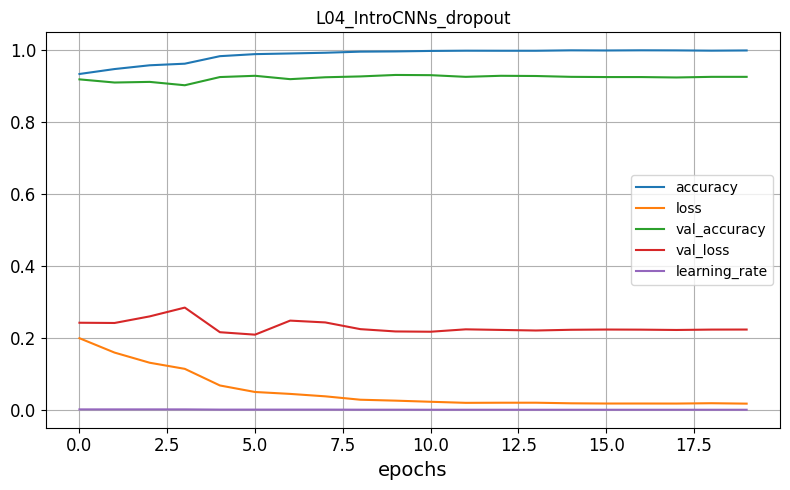

In [56]:
# SOLUTION PLOT HISTORY
print_history(history3,"L04_IntroCNNs_dropout")

## 3. Test
**¡AHORA TÚ!**
- Carga alguno de los modelos salvados anteriormente y evalúalo (usando `evaluate()`), sobre las muestras reservadas para test.
- A continuación:
  - Evalúa el modelo sobre el set de test empleando `evaluate()`
  - En otra celda genera predicciones con `predict()` sobre **todo el subconjunto de test**.

In [57]:
#TODO LOAD MODEL

In [ ]:
#TODO EVALUATE MODEL

In [ ]:
#TODO PREDICT

In [58]:
#model = keras.models.load_model("model1.keras")
#model = keras.models.load_model("model2.keras")
#model = keras.models.load_model("model3.keras")
model = keras.models.load_model("model4.keras")

In [61]:
# SOLUTION
score = model.evaluate(X_test, Y_test)

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.9380 - loss: 0.1943


In [62]:
# SOLUTION
#Y_pred = model.predict(X_test)
Y_pred = np.argmax(model.predict(X_test),axis=-1)

107/107 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


### Matriz de confusión
**¡AHORA TÚ!**
- Utiliza las predicciones anteriores para generar un matriz de confusión normalizada y otra sin normalizar.
    - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

In [ ]:
#TODO

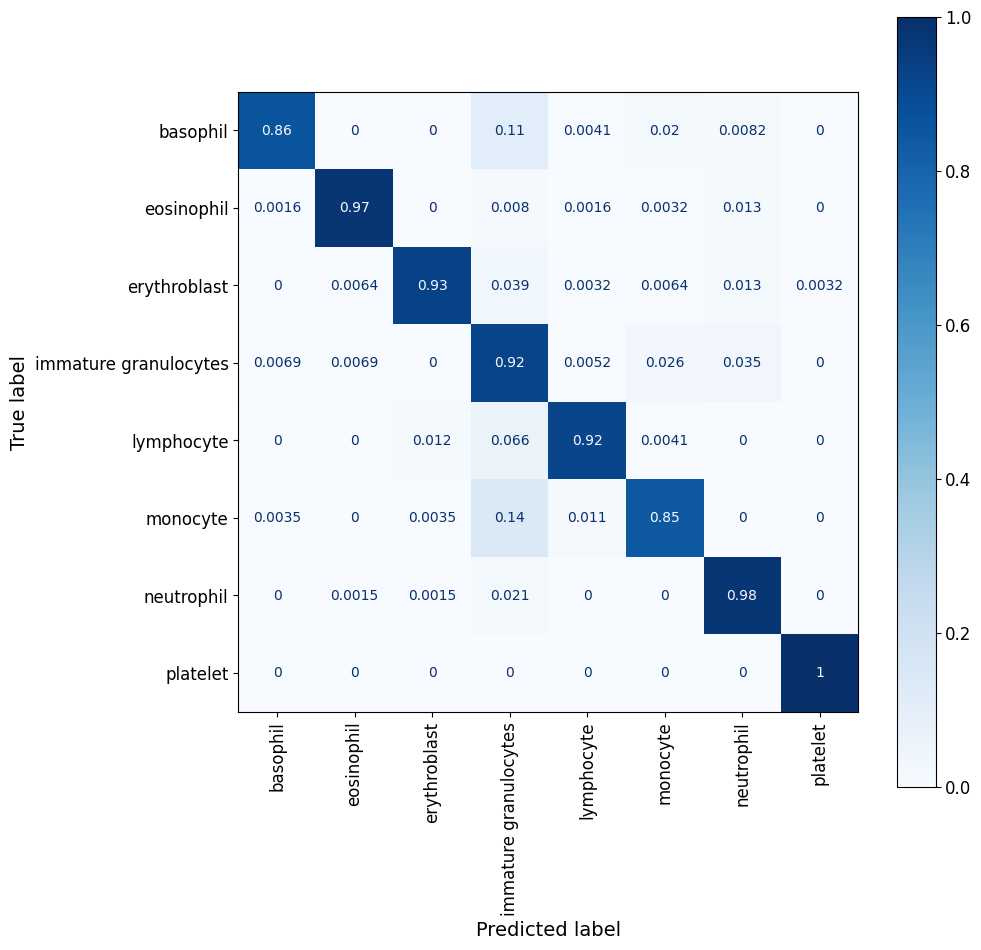

In [66]:
#SOLUTION
Y_true = Y_test
confnorm = confusion_matrix(Y_true, Y_pred,normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=confnorm,
                                display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

### Métricas de rendimiento
**¡AHORA TÚ!**
- Genera ahora una matriz de confusión sin normalizar.

In [ ]:
#TODO

In [69]:
#SOLUTION
conf = confusion_matrix(Y_true, Y_pred)
print(conf)

[[210   0   0  26   1   5   2   0]
 [  1 607   0   5   1   2   8   0]
 [  0   2 289  12   1   2   4   1]
 [  4   4   0 533   3  15  20   0]
 [  0   0   3  16 223   1   0   0]
 [  1   0   1  39   3 240   0   0]
 [  0   1   1  14   0   0 650   0]
 [  0   0   0   0   0   0   0 470]]


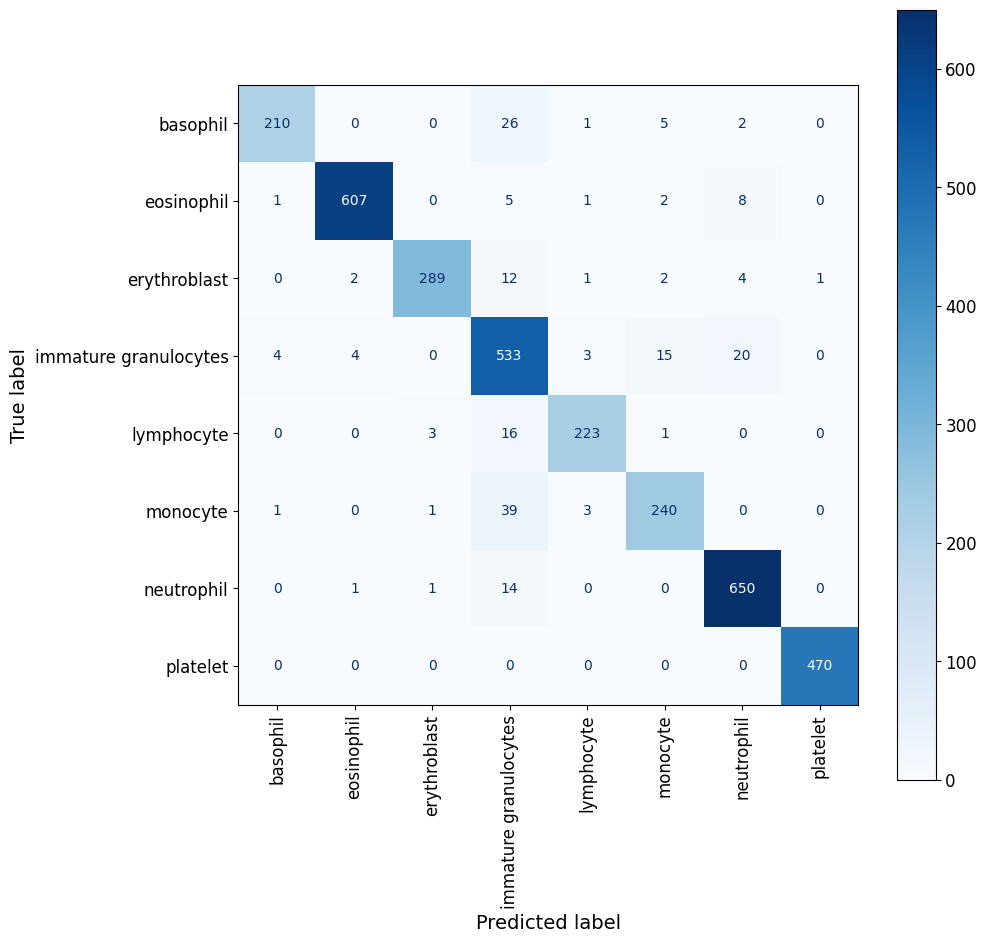

In [70]:
#SOLUTION
disp = ConfusionMatrixDisplay(confusion_matrix=conf,
                                display_labels=labels)
fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax,cmap=plt.cm.Blues)
plt.xticks(rotation=90)
plt.show()

**¡AHORA TÚ!**
- Observa cómo podemos obtener los TP,TN,FP y FN a partir de la matriz de confusión `conf`.
- Revisa el significado de estas variables y entiende cómo se han obtenido a partir de `conf`. ¿Por qué estas variables se expresan en forma de vectores en lugar de valores escalares?

In [71]:
TP = np.diag(conf)
FP = conf.sum(axis=0) - TP
FN = conf.sum(axis=1) - TP
TN = conf.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

**¡AHORA TÚ!**
- Calcula e imprime la métrica F1-score para cada clase y su valor medio.
- ¿Cuáles son las clases con las mejores/peores métricas F1-score?
- Prueba a calcular e imprimir también las métricas _Accuracy_, _Sensitivity_ y _Specificity_.

In [ ]:
#TODO

In [72]:
# SOLUTION
# F1 Score
FONE = 2*TP/(2*TP + FP + FN)

In [73]:
#SOLUTION
print("F1-score: ")
print(["{:0.2f}".format(x) for x in FONE])

F1-score: 
['0.91', '0.98', '0.96', '0.87', '0.94', '0.87', '0.96', '1.00']


In [74]:
#SOLUTION
print("Avg F1-score: {:0.2f}".format(np.mean(FONE)))

Avg F1-score: 0.94


In [75]:
#SOLUTION
# Precision or positive predictive value
PPV = TP/(TP+FP)
# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Specificity or true negative rate
TNR = TN/(TN+FP)
# Overall accuracy for each class
ACC = (TP+TN)/(TP+FP+FN+TN)

In [76]:
#SOLUTION
print("Precision: ")
print(["{:0.2f}".format(x) for x in PPV])
print("Recall: ")
print(["{:0.2f}".format(x) for x in TPR])
print("Specificity: ")
print(["{:0.2f}".format(x) for x in TNR])
print("Accuracy: ")
print(["{:0.2f}".format(x) for x in ACC])


Precision: 
['0.97', '0.99', '0.98', '0.83', '0.96', '0.91', '0.95', '1.00']
Recall: 
['0.86', '0.97', '0.93', '0.92', '0.92', '0.85', '0.98', '1.00']
Specificity: 
['1.00', '1.00', '1.00', '0.96', '1.00', '0.99', '0.99', '1.00']
Accuracy: 
['0.99', '0.99', '0.99', '0.95', '0.99', '0.98', '0.99', '1.00']


# 4. Mejorando el modelo

### L1 and L2 Regularization
- Podemos incluir regularización L2 con factor 0.01 en las capas Dense o Conv2D de la siguiente manera:
```
keras.layers.Dense(100, activation= ...,                                  
                    kernel_regularizer=keras.regularizers.l2(0.01))
keras.layers.Conv2D(32, kernel_size=...,kernel_regularizer=keras.regularizers.l2(0.01),...)
 - `l2(0.01)` para L2 con factor 0.01
 - `l1(0.1)` para L1 con factor 0.1
 - `l1_l2(0.1, 0.01)` para L1 y L2 con factores 0.1 y 0.01 respectivamente
```

**¡AHORA TÚ!**
- Crea un nuevo modelo `model5` probando a introducir regularización en las distintas capas de `model3` y entrena durante al menos 25 épocas utilizando _Early Stopping_ y algún otro _callback_ de tu elección.

In [ ]:
#TODO...

In [77]:
#SOLUTION
model5 = keras.models.Sequential()
model5.add(keras.layers.Conv2D(16, kernel_size=(3, 3),kernel_regularizer=keras.regularizers.l2(0.01),
                 padding='same',use_bias=False,
                 input_shape=(28, 28, 3)))
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.Activation("relu"))
model5.add(keras.layers.MaxPooling2D((2, 2)))
model5.add(keras.layers.Conv2D(32, kernel_size=(3, 3), kernel_regularizer=keras.regularizers.l2(0.01),
                padding='same',use_bias=False))
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.Activation("relu"))
model5.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(32,use_bias=False))
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.Activation("relu"))
model5.add(keras.layers.Dense(10, activation='softmax'))
model5.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 28, 28, 16)          │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 28, 28, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_15 (Activation)           │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 14, 14, 32)          │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_16 (Activation)           │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_6 (Flatten)                  │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 32)                  │          50,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_17 (Activation)           │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 55,866 (218.23 KB)

 Trainable params: 55,706 (217.60 KB)

 Non-trainable params: 160 (640.00 B)

In [79]:
# SOLUTION
model5.compile(loss="sparse_categorical_crossentropy",
              optimizer='RMSProp',
              metrics=["accuracy"])
history5 = model5.fit(X_train, Y_train, epochs=20,
                    validation_data=(X_valid, Y_valid),
                   callbacks=[lr_scheduler,early_stopping_cb,model_checkpoint_cb])

Epoch 1/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.7504 - loss: 1.0655 - val_accuracy: 0.8411 - val_loss: 0.5592 - learning_rate: 0.0010
Epoch 2/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9000 - loss: 0.4360 - val_accuracy: 0.8621 - val_loss: 0.4899 - learning_rate: 0.0010
Epoch 3/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 14s 37ms/step - accuracy: 0.9159 - loss: 0.3267 - val_accuracy: 0.8954 - val_loss: 0.3559 - learning_rate: 0.0010
Epoch 4/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 20s 37ms/step - accuracy: 0.9379 - loss: 0.2573 - val_accuracy: 0.9089 - val_loss: 0.3349 - learning_rate: 0.0010
Epoch 5/20
374/374 ━━━━━━━━━━━━━━━━━━━━ 20s 36ms/step - accuracy: 0.9413 - loss: 0.2350 - val_accuracy: 0.9147 - val_loss: 0.3028 - learning_rate: 0.0010
Epoch 5: early stopping


Saving figure L04_IntroCNNs_l1l2


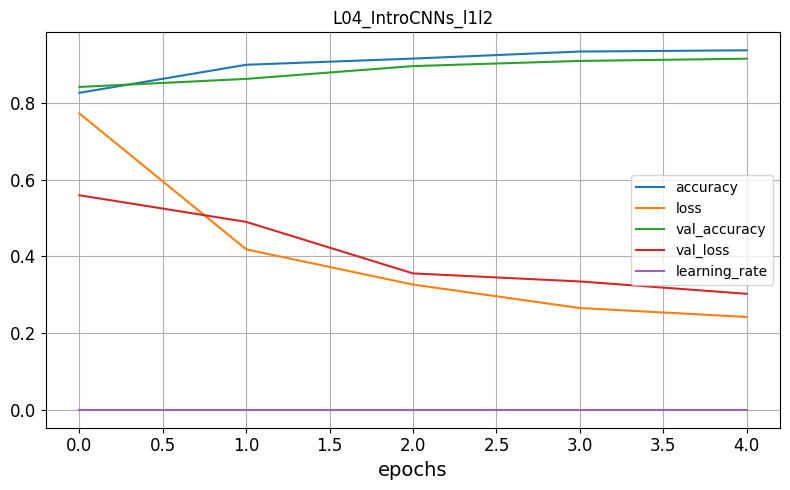

In [80]:
# SOLUTION
print_history(history5,"L04_IntroCNNs_l1l2")

### (Opcional) Aumentando la profundidad de la red

**¡AHORA TÚ!**
- Para hacer este apartado se requiere utilizar la nube de cómputo o un ordenador potente configurados con GPUs
- Lo que tenemos hasta ahora no es una red suficientemente _"deep"_. Crea un modelo `model6` aumentando el número de capas convolucionales de la red `model4` y la profundidad de la red (número de filtros de convolución).   
  - Deberías aumentar el número de channels en las capas más profundas de la red, ¿sabes contestar por qué?.
   - Observa que también puedes aumentar el número de neuronas en la capa _hidden_ de perceptrón multicapa (MLP) que hay al final de la red.
   - Controla el número de parámetros entrenables y número de capas en un tamaño manejable para el equipo que estás utilizando.
   - No utilices regularización L2 en este experimento si tu ordenador es demasiado lento.
   - Recuerda que puedes añadir _callbacks_ para variar el _learning rate_ dinámicamente.
   - Lanza el entrenamiento para un número de _epochs_ elevado (por ejemplo 50) y recuerda que puedes utilizar _early stopping_ ajustando el parámetro _patience_.
- A ver si puedes obtener un resultado cercano a `val_accuracy` en torno a 93%... ¡o mejor aún!

In [ ]:
#TODO ...

In [81]:
# SOLUTION
model6 = keras.models.Sequential()
model6.add(keras.layers.Conv2D(16, kernel_size=(3, 3),
                 padding='same',use_bias=False,input_shape=(28, 28, 3)))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Activation('relu'))
model6.add(keras.layers.MaxPooling2D((2, 2)))
model6.add(keras.layers.Dropout(0.25)),
model6.add(keras.layers.Conv2D(32, kernel_size=(3, 3),padding='same',use_bias=False))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Activation("relu"))
model6.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model6.add(keras.layers.Dropout(0.25)),
model6.add(keras.layers.Conv2D(64, kernel_size=(3, 3),padding='same',use_bias=False))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Activation("relu"))
model6.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model6.add(keras.layers.Dropout(0.25)),
model6.add(keras.layers.Conv2D(128, kernel_size=(3, 3),padding='same',use_bias=False))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Activation("relu"))
model6.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
model6.add(keras.layers.Dropout(0.25)),
model6.add(keras.layers.Flatten())
model6.add(keras.layers.Dense(128,use_bias=False))
model6.add(keras.layers.BatchNormalization())
model6.add(keras.layers.Activation("relu"))
model6.add(keras.layers.Dense(10, activation='softmax'))
model6.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 16)          │             432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 28, 28, 16)          │              64 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_18 (Activation)           │ (None, 28, 28, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 14, 14, 32)          │           4,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 14, 14, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_19 (Activation)           │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 7, 7, 64)            │          18,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 7, 7, 64)            │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_20 (Activation)           │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 3, 3, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 3, 3, 128)           │          73,728 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 3, 3, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_21 (Activation)           │ (None, 3, 3, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 1, 1, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 116,346 (454.48 KB)

 Trainable params: 115,610 (451.60 KB)

 Non-trainable params: 736 (2.88 KB)

In [83]:
#SOLUTION
early_stopping_cb = keras.callbacks.EarlyStopping(patience=6,verbose=1)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("model6.keras", save_best_only=True)
lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.4, patience=3,verbose=1)

In [84]:
# SOLUTION
model6.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])
history6 = model6.fit(X_train, Y_train, epochs=50,
                    validation_data=(X_valid, Y_valid),
                   callbacks=[lr_scheduler,early_stopping_cb,model_checkpoint_cb])

Epoch 1/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 22s 51ms/step - accuracy: 0.8677 - loss: 0.3624 - val_accuracy: 0.8972 - val_loss: 0.2927 - learning_rate: 0.0010
Epoch 2/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.8733 - loss: 0.3452 - val_accuracy: 0.8826 - val_loss: 0.3077 - learning_rate: 0.0010
Epoch 3/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 18s 49ms/step - accuracy: 0.8859 - loss: 0.3204 - val_accuracy: 0.9112 - val_loss: 0.2414 - learning_rate: 0.0010
Epoch 4/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 21s 51ms/step - accuracy: 0.8919 - loss: 0.3056 - val_accuracy: 0.9136 - val_loss: 0.2389 - learning_rate: 0.0010
Epoch 5/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 19s 51ms/step - accuracy: 0.8886 - loss: 0.3075 - val_accuracy: 0.9118 - val_loss: 0.2384 - learning_rate: 0.0010
Epoch 6/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 20s 48ms/step - accuracy: 0.9008 - loss: 0.2768 - val_accuracy: 0.9188 - val_loss: 0.2392 - learning_rate: 0.0010
Epoch 7/50
374/374 ━━━━━━━━━━━━━━━━━━━━ 20s 54ms/step - accuracy: 0.8977 - l

Saving figure L04_IntroCNNs_deep


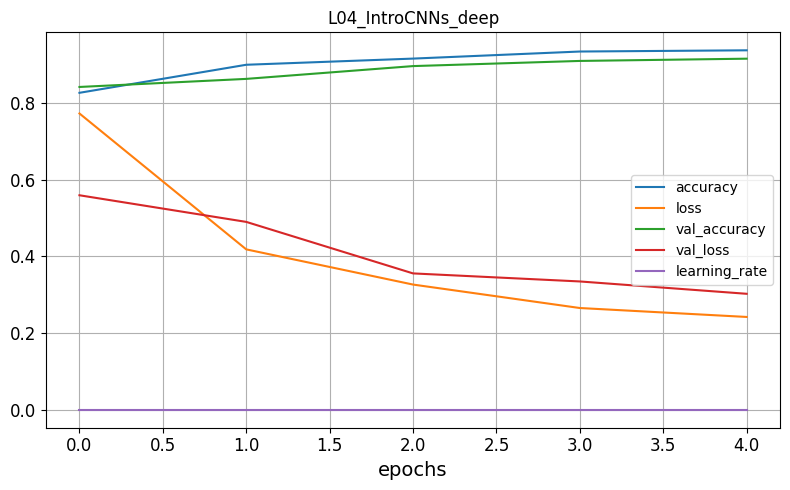

In [85]:
# SOLUTION
print_history(history5,"L04_IntroCNNs_deep")

In [86]:
#SOLUTION
score = model6.evaluate(X_test, Y_test)

107/107 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9309 - loss: 0.1918


## Ampliación

- Blog towardsdatascience: The 4 Convolutional Neural Network Models That Can Classify Your Fashion Images

https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d
- Fashion MNIST benchmark

https://paperswithcode.com/sota/image-classification-on-fashion-mnist